#   Task1: Predict Restaurant Ratings

Objective: Build a machine learning model to predict the
aggregate rating of a restaurant based on other features.

Steps:

- Preprocess the dataset by handling missing values, encoding categorical variables, and splitting the data into training and testing sets.
- Select a regression algorithm (e.g., linear regression, decision tree regression) and train it on the training data.
- Evaluate the models performance using appropriate regression metrics (e.g., mean squared error, R-squared) on the testing data.
- Interpret the models results and analyze the most influential features affecting restaurant ratings.

In [108]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 


%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, classification_report
       

In [109]:
# load dataframe
df = pd.read_csv('Dataset .csv')
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## Handling missing values

In [110]:
#check row and column
df.shape

(9551, 21)

In [111]:
# check for null values
df.isnull()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9547,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9548,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9549,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [112]:
#Find the missing values from each column
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

<Axes: >

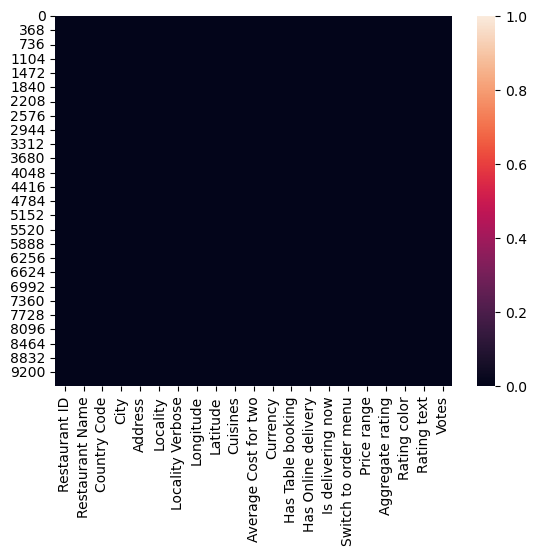

In [113]:
sns.heatmap(df.isnull())


In [114]:
#Find the total number of missing values from the entire dataset
df.isnull().sum().sum()

9

In [115]:
#delete values in cuisines 
df.dropna(subset=['Cuisines'])
#delete all null values
df.dropna(inplace=True)
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [116]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

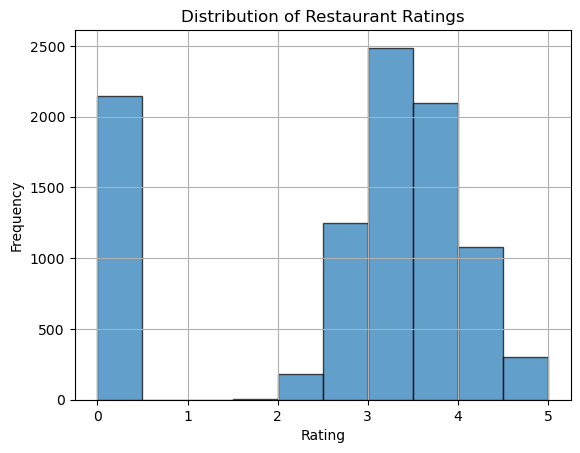

In [154]:
#Plotting a bar graph showing the distribution of Restaurant ratings
plt.hist(df["Aggregate rating"], bins=10, range=(0, 5), edgecolor='black', alpha=0.7)

plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.xticks(range(6))

plt.grid(True)
plt.show()
     


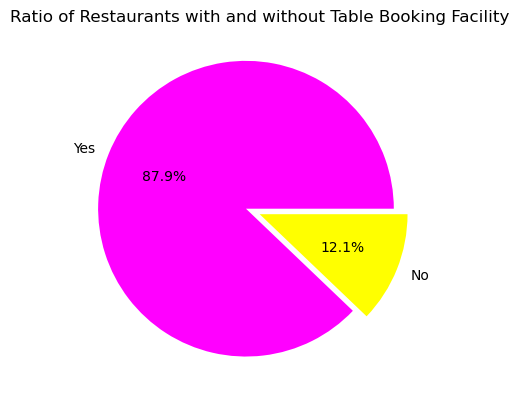

In [163]:
# plot a piechart for has table booking column
labels = ['Yes', 'No']
sizes = df['Has Table booking'].value_counts()
colors = ['magenta', 'yellow']
explode = [0.1, 0]

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Ratio of Restaurants with and without Table Booking Facility')
plt.show()
     

In [157]:
online_delv_counts = df['Has Online delivery'].value_counts()
print(online_delv_counts)
     

Has Online delivery
0    7091
1    2451
Name: count, dtype: int64


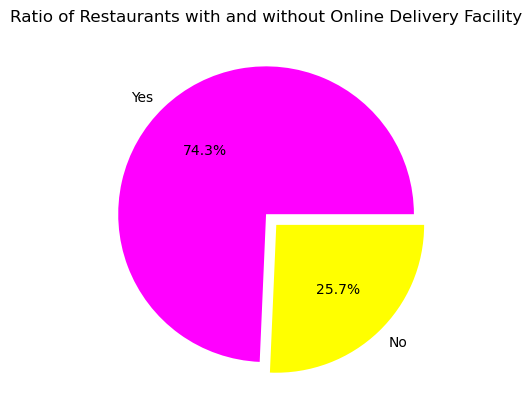

In [158]:
#pie chart to show distribution of restaurants having online delivery or not
plt.pie(online_delv_counts, explode=[0,0.1], labels=['Yes','No'],colors=['magenta','yellow'], autopct='%1.1f%%')
plt.title('Ratio of Restaurants with and without Online Delivery Facility')
plt.show()

## Encoding Categorical Variables

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer

In [118]:
print(df.dtypes)


Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


In [119]:
#df = df.select_dtypes(include=['object']).copy()
#df

In [120]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu  9542

In [121]:
df.describe().round(2)


,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9542.00,9542.00,9542.00,9542.00,9542.00,9542.00,9542.00,9542.00
mean,9043300.52,18.18,64.27,25.85,1200.33,1.80,2.67,156.77
std,8791967.36,56.45,41.20,11.01,16128.74,0.91,1.52,430.20
min,53.00,1.00,-157.95,-41.33,0.00,1.00,0.00,0.00
25%,301931.25,1.00,77.08,28.48,250.00,1.00,2.50,5.00
50%,6002725.50,1.00,77.19,28.57,400.00,2.00,3.20,31.00
75%,18352604.25,1.00,77.28,28.64,700.00,2.00,3.70,130.00
max,18500652.00,216.00,174.83,55.98,800000.00,4.00,4.90,10934.00


In [122]:
# drop features that inhibit model building
df = df.drop('Restaurant ID', axis=1)
df = df.drop('Restaurant Name', axis=1)
df = df.drop('Country Code', axis=1)
df = df.drop('City', axis=1)
df = df.drop('Address', axis=1)
df = df.drop('Locality', axis=1)
df = df.drop('Locality Verbose', axis=1)
df = df.drop('Longitude', axis=1)
df = df.drop('Latitude', axis=1)
df = df.drop('Cuisines', axis=1)
df = df.drop('Currency', axis=1)
print(df.describe())

       Average Cost for two  Price range  Aggregate rating         Votes
count           9542.000000  9542.000000       9542.000000   9542.000000
mean            1200.326137     1.804968          2.665238    156.772060
std            16128.743876     0.905563          1.516588    430.203324
min                0.000000     1.000000          0.000000      0.000000
25%              250.000000     1.000000          2.500000      5.000000
50%              400.000000     2.000000          3.200000     31.000000
75%              700.000000     2.000000          3.700000    130.000000
max           800000.000000     4.000000          4.900000  10934.000000


In [123]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Has Table booking'] = le.fit_transform(df['Has Table booking'])
df['Has Online delivery'] = le.fit_transform(df['Has Online delivery'])
df['Is delivering now'] = le.fit_transform(df['Is delivering now'])
df['Switch to order menu'] = le.fit_transform(df['Switch to order menu'])
df['Rating color'] = le.fit_transform(df['Rating color'])
df['Rating text'] = le.fit_transform(df['Rating text'])
df

,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1100,1,0,0,0,3,4.8,0,1,314
1,1200,1,0,0,0,3,4.5,0,1,591
2,4000,1,0,0,0,4,4.4,1,5,270
3,1500,0,0,0,0,4,4.9,0,1,365
4,1500,1,0,0,0,4,4.8,0,1,229
...,...,...,...,...,...,...,...,...,...,...
9546,80,0,0,0,0,3,4.1,1,5,788
9547,105,0,0,0,0,3,4.2,1,5,1034
9548,170,0,0,0,0,4,3.7,5,2,661
9549,120,0,0,0,0,4,4.0,1,5,901


In [124]:
numeric_columns = df.select_dtypes(include=['int', 'float'])
summary_stats = numeric_columns.describe()
print(summary_stats)
     

       Average Cost for two  Has Table booking  Has Online delivery  \
count           9542.000000        9542.000000          9542.000000   
mean            1200.326137           0.121358             0.256864   
std            16128.743876           0.326560             0.436927   
min                0.000000           0.000000             0.000000   
25%              250.000000           0.000000             0.000000   
50%              400.000000           0.000000             0.000000   
75%              700.000000           0.000000             1.000000   
max           800000.000000           1.000000             1.000000   

       Is delivering now  Switch to order menu  Price range  Aggregate rating  \
count        9542.000000                9542.0  9542.000000       9542.000000   
mean            0.003563                   0.0     1.804968          2.665238   
std             0.059589                   0.0     0.905563          1.516588   
min             0.000000            

In [125]:
from matplotlib import pyplot as plt
%matplotlib inline

<Axes: xlabel='Aggregate rating', ylabel='Votes'>

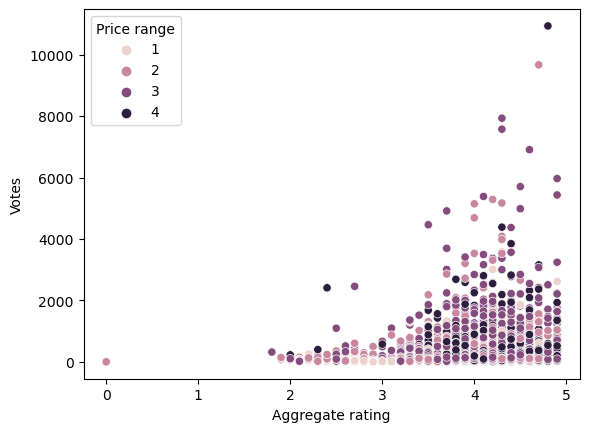

In [126]:
sns.scatterplot(x=df["Aggregate rating"],y=df["Votes"],hue=df["Price range"])


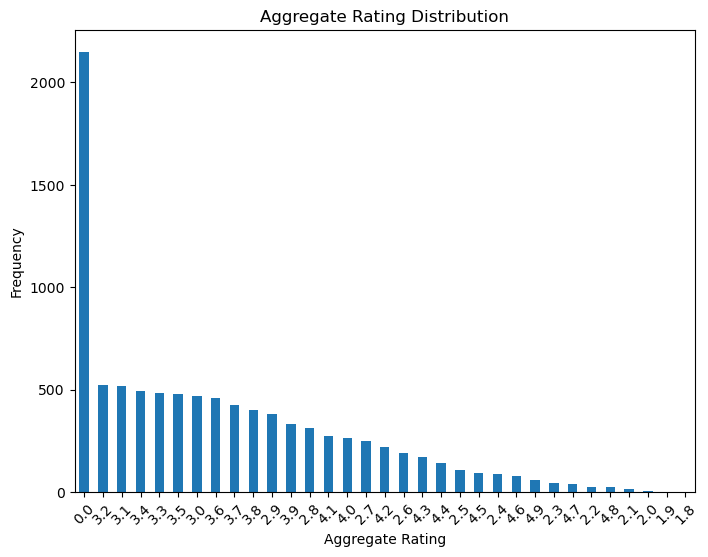

In [160]:
rating_counts = df['Aggregate rating'].value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
rating_counts.plot(kind='bar')
plt.title('Aggregate Rating Distribution')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## Splitting the data into training and testing sets.

In [127]:
a = df.iloc[1:,1:10].values
a


array([[  1.,   0.,   0., ...,   0.,   1., 591.],
       [  1.,   0.,   0., ...,   1.,   5., 270.],
       [  0.,   0.,   0., ...,   0.,   1., 365.],
       ...,
       [  0.,   0.,   0., ...,   5.,   2., 661.],
       [  0.,   0.,   0., ...,   1.,   5., 901.],
       [  0.,   0.,   0., ...,   1.,   5., 591.]])

In [128]:
b=df.iloc[1:,20:].values
b

array([], shape=(9541, 0), dtype=float64)

In [129]:
x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=.3,random_state=0)

In [130]:
x_train

array([[  1.,   0.,   0., ...,   2.,   0., 137.],
       [  0.,   0.,   0., ...,   2.,   0.,  12.],
       [  0.,   1.,   0., ...,   5.,   2., 321.],
       ...,
       [  0.,   0.,   0., ...,   2.,   0.,  40.],
       [  0.,   0.,   0., ...,   2.,   0.,  29.],
       [  0.,   0.,   0., ...,   2.,   0.,  10.]])

In [131]:
y_test

array([], shape=(2863, 0), dtype=float64)

In [132]:
print("x_train: ", x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)
     

x_train:  (6678, 9)
x_test:  (2863, 9)
y_train:  (6678, 0)
y_test:  (2863, 0)


In [141]:
x = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

In [142]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=250)
x_train.head()
y_train.head()

5883    3.8
5470    3.2
5790    0.0
5588    0.0
9283    4.1
Name: Aggregate rating, dtype: float64

In [143]:
print("x_train: ", x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)
     


x_train:  (7633, 9)
x_test:  (1909, 9)
y_train:  (7633,)
y_test:  (1909,)


## Aegression Algorithm

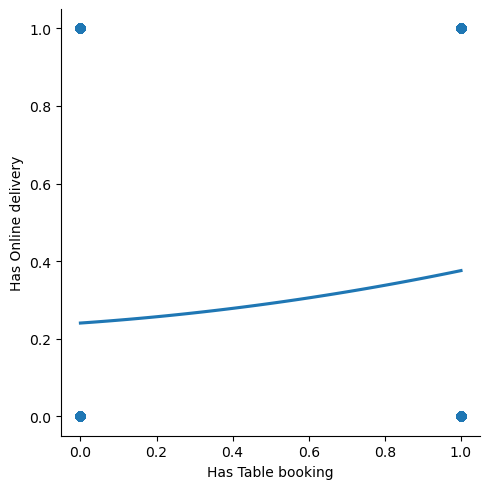

In [144]:
sns.lmplot(x ="Has Table booking", y ="Has Online delivery", data = df, order = 2, ci = None) 
plt.show()

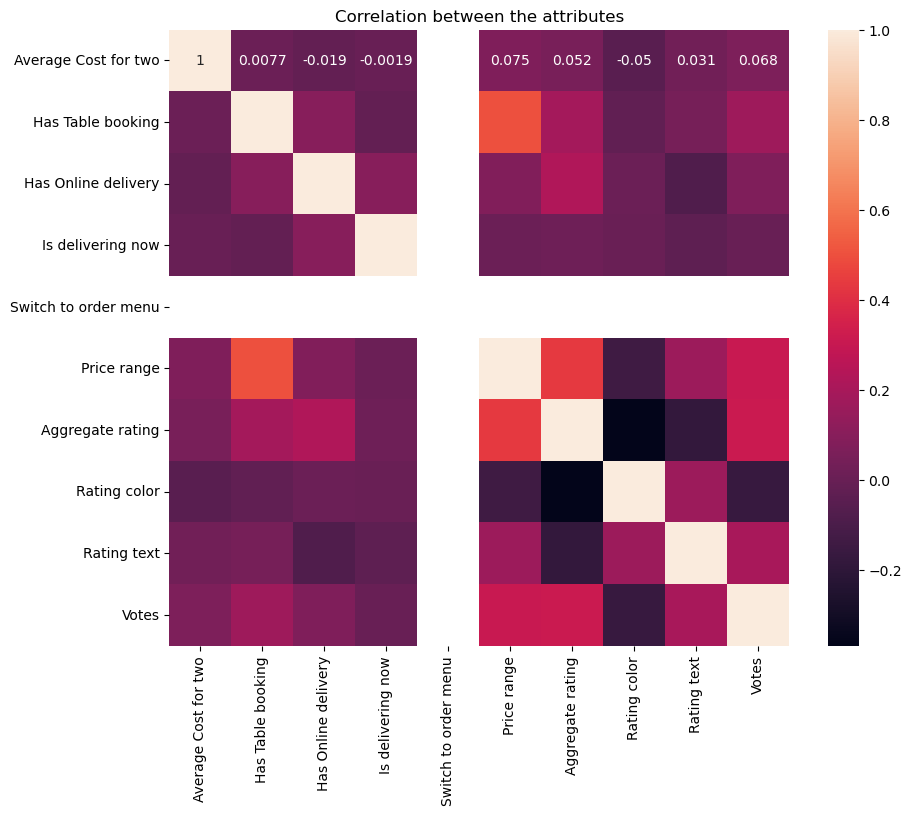

In [146]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation between the attributes")
plt.show()
     


Linear Regression Model

In [147]:
from sklearn.linear_model import LinearRegression


In [149]:
linreg = LinearRegression()
linreg.fit(x_train,y_train)
linreg_pred=linreg.predict(x_test)
     

In [150]:
linreg_mae = mean_absolute_error(y_test, linreg_pred)
linreg_mse = mean_squared_error(y_test, linreg_pred)
linreg_r2 = r2_score(y_test, linreg_pred)
print(f"MAE of the linear regression model is: {linreg_mae:.2f}")
print(f"MSE of the linear regression model is: {linreg_mse:.2f}")
print(f"R2 score of the linear regression model is: {linreg_r2:.2f}")

MAE of the linear regression model is: 1.00
MSE of the linear regression model is: 1.42
R2 score of the linear regression model is: 0.39


Decision Tree Model

In [151]:
from sklearn.tree import DecisionTreeRegressor

In [152]:
dtree = DecisionTreeRegressor()
dtree.fit(x_train, y_train)
dtree_pred = dtree.predict(x_test)
     

In [153]:

dtree_mae = mean_absolute_error(y_test, dtree_pred)
dtree_mse = mean_squared_error(y_test, dtree_pred)
dtree_r2 = r2_score(y_test, dtree_pred)
print(f"MAE of the decision tree model is: {dtree_mae:.2f}")
print(f"MSE of the decision tree model is: {dtree_mse:.2f}")
print(f"R2 score of the decision tree model is: {dtree_r2:.2f}")
     

MAE of the decision tree model is: 0.15
MSE of the decision tree model is: 0.05
R2 score of the decision tree model is: 0.98
